# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from pandas.api.types import CategoricalDtype

MIN_NUM_GEO_VAL = 4
PERCENT_ENTITY_NULL = 0.8

In [2]:
dtype = {"geo_value":"str"}
df = pd.read_csv("test_dataset.csv", dtype=dtype)

display(df.head(3))
print("Shape: ", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
0,2021-02-06,1000,41.139818,12.574088,2.352412,60.279050,68.389237,18.871568,63.643675,24.295383,40.000558,60.090893,1.581060,13.265691,29.196630,23.113078,6.272597,22.195767,83.519567,14.843109
1,2021-02-06,1003,50.357895,9.201818,2.549523,71.199114,61.413877,23.472058,70.913172,NaN,38.389029,51.549104,0.277357,18.615520,36.970742,31.598966,7.122820,25.662093,84.389617,20.843204
2,2021-02-06,1069,44.300650,12.775592,3.125653,68.845843,60.143342,NaN,71.030892,NaN,41.563697,63.524781,1.032663,22.923627,NaN,20.550398,NaN,NaN,89.599959,10.899268


Shape:  (4479, 20)


### Data Format

In [3]:
# Inconsistant geo_value (4 digits) -> drop
# Insufficient geo_value (ending with 000) -> drop
df['count_geo_value'] = df['geo_value'].apply(lambda x : len(x))
df = df[df['count_geo_value']==5].reset_index(drop = True)
df = df[~df['geo_value'].str.contains(r'000$', regex=True)]
df = df.drop(columns = {'count_geo_value'})

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
0,2021-02-06,10001,32.699199,19.187633,8.791025,68.827417,65.663218,26.680991,65.330731,NaN,48.183010,87.508954,0.527201,20.026080,37.648337,27.671691,4.305266,30.862734,94.674122,7.642234
1,2021-02-06,10003,31.553546,19.640300,1.734027,77.337621,69.074369,30.640224,59.172863,13.22735,34.211835,90.573181,0.597668,19.640517,36.080704,15.821675,11.593119,36.163271,94.214410,7.552619
2,2021-02-06,10005,29.907508,17.423573,1.471261,72.751957,69.181260,28.933523,52.183279,NaN,34.874907,90.131650,0.148176,21.743799,28.396136,20.385174,9.320209,31.270389,93.640479,8.254443
3,2021-02-06,11001,28.081273,14.987276,14.657848,90.890175,73.313222,47.344860,50.391497,NaN,22.055291,94.388015,0.725608,19.919595,34.983371,13.359537,16.403451,48.792776,97.975082,4.377356
5,2021-02-06,12001,42.656218,17.967606,2.933287,81.169974,72.992327,32.985404,59.241447,NaN,41.954745,75.226267,1.090737,32.701719,34.171101,23.109915,9.375780,45.060567,91.186612,9.723889


Shape : (3571, 20)


In [4]:
dtype = {"FIPS State":str, "FIPS County":str}
df_fips = pd.read_excel(r"US_FIPS_Codes.xlsx", dtype=dtype)
df_fips['geo_value'] = df_fips['FIPS State'] + df_fips['FIPS County']
df_fips = df_fips.drop(columns = {"FIPS State",'FIPS County'})

display(df_fips.head())
print("Shape :", df_fips.shape)

,State,County Name,geo_value
0,Alabama,Autauga,01001
1,Alabama,Baldwin,01003
2,Alabama,Barbour,01005
3,Alabama,Bibb,01007
4,Alabama,Blount,01009


Shape : (3142, 3)


In [5]:
df.merge(df_fips, on='geo_value', how='left').isnull().sum()

time_value                                 0
geo_value                                  0
smoothed_wspent_time_1d                  205
smoothed_wtested_14d                     119
smoothed_wpublic_transit_1d              205
smoothed_wcovid_vaccinated_or_accept     147
smoothed_wworried_become_ill             377
smoothed_wvaccine_likely_govt_health     882
smoothed_wshop_1d                        205
smoothed_wtested_positive_14d           3344
smoothed_wwork_outside_home_1d           205
smoothed_wothers_masked                  467
smoothed_wcli                              0
smoothed_wcovid_vaccinated               132
smoothed_wvaccine_likely_friends         881
smoothed_wrestaurant_1d                  205
smoothed_wvaccine_likely_politicians     907
smoothed_wvaccine_likely_who             882
smoothed_wwearing_mask                   933
smoothed_wlarge_event_1d                 205
State                                      0
County Name                                0
dtype: int

In [6]:
df = df.merge(df_fips, on='geo_value', how='left')

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,...,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name
0,2021-02-06,10001,32.699199,19.187633,8.791025,68.827417,65.663218,26.680991,65.330731,NaN,...,0.527201,20.026080,37.648337,27.671691,4.305266,30.862734,94.674122,7.642234,Delaware,Kent
1,2021-02-06,10003,31.553546,19.640300,1.734027,77.337621,69.074369,30.640224,59.172863,13.22735,...,0.597668,19.640517,36.080704,15.821675,11.593119,36.163271,94.214410,7.552619,Delaware,New Castle
2,2021-02-06,10005,29.907508,17.423573,1.471261,72.751957,69.181260,28.933523,52.183279,NaN,...,0.148176,21.743799,28.396136,20.385174,9.320209,31.270389,93.640479,8.254443,Delaware,Sussex
3,2021-02-06,11001,28.081273,14.987276,14.657848,90.890175,73.313222,47.344860,50.391497,NaN,...,0.725608,19.919595,34.983371,13.359537,16.403451,48.792776,97.975082,4.377356,District of Columbia,District of Columbia
4,2021-02-06,12001,42.656218,17.967606,2.933287,81.169974,72.992327,32.985404,59.241447,NaN,...,1.090737,32.701719,34.171101,23.109915,9.375780,45.060567,91.186612,9.723889,Florida,Alachua


Shape : (3571, 22)


In [7]:
# Find the largest mode
df_num_time_by_geo = df.groupby(['geo_value']).agg({"time_value":"nunique"})
mode_number_of_recode = statistics.multimode(df_num_time_by_geo['time_value'])
max_mode_number_of_recode = max(mode_number_of_recode)
display(df_num_time_by_geo[df_num_time_by_geo['time_value']<max_mode_number_of_recode])

,time_value
geo_value,
12055,3
12107,1
13115,2
17091,3
19155,4
20209,4
21093,6
21151,4
23003,1


In [8]:
list_remove_geo_value = list(df_num_time_by_geo[df_num_time_by_geo['time_value']!=max_mode_number_of_recode].index)
list_remove_geo_value[:5]

['12055', '12107', '13115', '17091', '19155']

In [9]:
df = df[~df['geo_value'].isin(list_remove_geo_value)].reset_index(drop = True)

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,...,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name
0,2021-02-06,10001,32.699199,19.187633,8.791025,68.827417,65.663218,26.680991,65.330731,NaN,...,0.527201,20.026080,37.648337,27.671691,4.305266,30.862734,94.674122,7.642234,Delaware,Kent
1,2021-02-06,10003,31.553546,19.640300,1.734027,77.337621,69.074369,30.640224,59.172863,13.22735,...,0.597668,19.640517,36.080704,15.821675,11.593119,36.163271,94.214410,7.552619,Delaware,New Castle
2,2021-02-06,10005,29.907508,17.423573,1.471261,72.751957,69.181260,28.933523,52.183279,NaN,...,0.148176,21.743799,28.396136,20.385174,9.320209,31.270389,93.640479,8.254443,Delaware,Sussex
3,2021-02-06,11001,28.081273,14.987276,14.657848,90.890175,73.313222,47.344860,50.391497,NaN,...,0.725608,19.919595,34.983371,13.359537,16.403451,48.792776,97.975082,4.377356,District of Columbia,District of Columbia
4,2021-02-06,12001,42.656218,17.967606,2.933287,81.169974,72.992327,32.985404,59.241447,NaN,...,1.090737,32.701719,34.171101,23.109915,9.375780,45.060567,91.186612,9.723889,Florida,Alachua


Shape : (3374, 22)


In [10]:
df.groupby(['geo_value']).agg({"time_value":"nunique"})[df.groupby(['geo_value']).agg({"time_value":"nunique"})['time_value']!=37]

,time_value
geo_value,
10001,7
10003,7
10005,7
11001,7
12001,7
...,...
55101,7
55105,7
55133,7


In [11]:
df.groupby(['State','County Name']).agg({"time_value":"nunique"}).head(20)

time_value
State                County Name                     
Delaware             Kent                           7
                     New Castle                     7
                     Sussex                         7
District of Columbia District of Columbia           7
Florida              Alachua                        7
                     Bay                            7
                     Brevard                        7
                     Broward                        7
                     Charlotte                      7
                     Citrus                         7
                     Clay                           7
                     Collier                        7
                     Duval                          7
                     Escambia                       7
                     Flagler                        7
                     Hernando                       7
                     Hillsborough                   7
                     Indian River                   7
                     Lake                           7
                     Lee                            7

### Data Type

In [12]:
df['time_value'] = pd.to_datetime(df['time_value'], errors='coerce')

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,...,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name
0,2021-02-06,10001,32.699199,19.187633,8.791025,68.827417,65.663218,26.680991,65.330731,NaN,...,0.527201,20.026080,37.648337,27.671691,4.305266,30.862734,94.674122,7.642234,Delaware,Kent
1,2021-02-06,10003,31.553546,19.640300,1.734027,77.337621,69.074369,30.640224,59.172863,13.22735,...,0.597668,19.640517,36.080704,15.821675,11.593119,36.163271,94.214410,7.552619,Delaware,New Castle
2,2021-02-06,10005,29.907508,17.423573,1.471261,72.751957,69.181260,28.933523,52.183279,NaN,...,0.148176,21.743799,28.396136,20.385174,9.320209,31.270389,93.640479,8.254443,Delaware,Sussex
3,2021-02-06,11001,28.081273,14.987276,14.657848,90.890175,73.313222,47.344860,50.391497,NaN,...,0.725608,19.919595,34.983371,13.359537,16.403451,48.792776,97.975082,4.377356,District of Columbia,District of Columbia
4,2021-02-06,12001,42.656218,17.967606,2.933287,81.169974,72.992327,32.985404,59.241447,NaN,...,1.090737,32.701719,34.171101,23.109915,9.375780,45.060567,91.186612,9.723889,Florida,Alachua


Shape : (3374, 22)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3374 entries, 0 to 3373
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   time_value                            3374 non-null   datetime64[ns]
 1   geo_value                             3374 non-null   object        
 2   smoothed_wspent_time_1d               3310 non-null   float64       
 3   smoothed_wtested_14d                  3352 non-null   float64       
 4   smoothed_wpublic_transit_1d           3310 non-null   float64       
 5   smoothed_wcovid_vaccinated_or_accept  3338 non-null   float64       
 6   smoothed_wworried_become_ill          3180 non-null   float64       
 7   smoothed_wvaccine_likely_govt_health  2689 non-null   float64       
 8   smoothed_wshop_1d                     3310 non-null   float64       
 9   smoothed_wtested_positive_14d         227 non-null    float64       
 10  

### Outlier

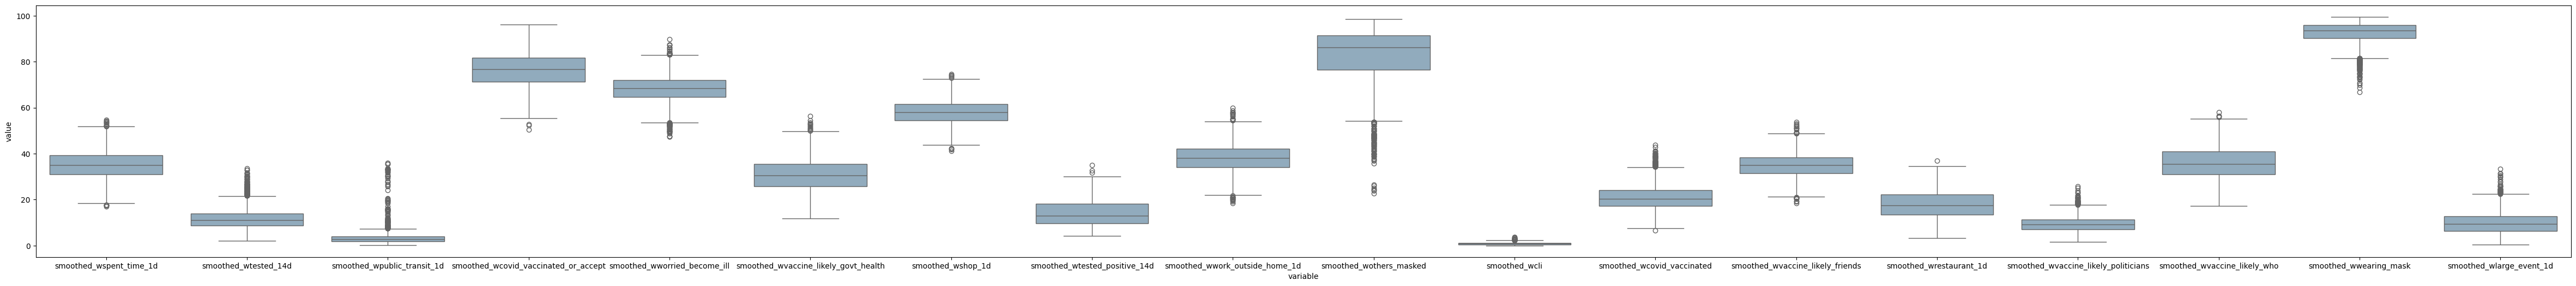

In [14]:
sns.set_palette("twilight")
plt.figure(figsize=(60, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(df.drop(columns = {'time_value','geo_value','State','County Name'})), whis=1.5)

plt.show()

In [15]:
list_feature = []
list_geo_val = []
WINDOW = 5
for a_col in list(df.columns):
    if a_col not in ['time_value','geo_value','State','County Name'
                     ,'day_of_week','rolling_mean','rolling_std','z_score','is_outlier'
                     ,'smoothed_wtested_14d'
                     ]:
        df['rolling_mean'] = (df.groupby('geo_value')[a_col].rolling(window=WINDOW, center=True).mean().reset_index(level=0, drop=True))
        df['rolling_std'] = (df.groupby('geo_value')[a_col].rolling(window=WINDOW, center=True).std().reset_index(level=0, drop=True))
        df['z_score'] = (df[a_col] - df['rolling_mean']) / df['rolling_std']
        df['is_outlier'] = df['z_score'].abs() > 1.96
        if df[df['is_outlier']==True]['geo_value'].nunique() != 0:
            for a_geo_val in df[df['is_outlier']==True]['geo_value'].unique():
                list_feature.append(a_col)
                list_geo_val.append(a_geo_val)
df = df.drop(columns = {"rolling_mean","rolling_std","z_score","is_outlier"})

In [16]:
dict_result = {'geo_val':list_geo_val, 'feature':list_feature}
df_result = pd.DataFrame(dict_result)
df_result

,geo_val,feature


In [17]:
list_feature = []
list_geo_val = []
WINDOW = 3
for a_col in list(df.columns):
    if a_col not in ['time_value','geo_value','State','County Name'
                     ,'day_of_week','rolling_mean','rolling_std','z_score','is_outlier'
                     ,'smoothed_wtested_14d'
                     ]:
        df['rolling_mean'] = (df.groupby('geo_value')[a_col].rolling(window=WINDOW, center=True).mean().reset_index(level=0, drop=True))
        df['rolling_std'] = (df.groupby('geo_value')[a_col].rolling(window=WINDOW, center=True).std().reset_index(level=0, drop=True))
        df['z_score'] = (df[a_col] - df['rolling_mean']) / df['rolling_std']
        df['is_outlier'] = df['z_score'].abs() > 1.96
        if df[df['is_outlier']==True]['geo_value'].nunique() != 0:
            for a_geo_val in df[df['is_outlier']==True]['geo_value'].unique():
                list_feature.append(a_col)
                list_geo_val.append(a_geo_val)
df = df.drop(columns = {"rolling_mean","rolling_std","z_score","is_outlier"})

In [18]:
dict_result = {'geo_val':list_geo_val, 'feature':list_feature}
df_result = pd.DataFrame(dict_result)
df_result

,geo_val,feature


### Distribution

In [19]:
list_skew_cols = []
for a_col in df.drop(columns = {'time_value','geo_value','State','County Name'}).columns:
    skew_val = df['%s'%a_col].skew()
    # print("%s: %s"%(a_col,skew_val))
    if (skew_val > 1) | (skew_val < -1):
        list_skew_cols.append(a_col)
list_skew_cols

['smoothed_wtested_14d',
 'smoothed_wpublic_transit_1d',
 'smoothed_wothers_masked',
 'smoothed_wwearing_mask']

### Time Series Plot

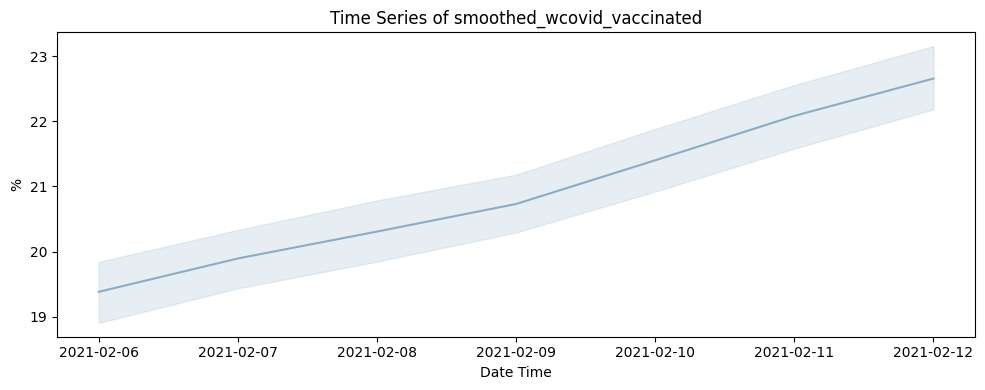

In [20]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='time_value', y='smoothed_wcovid_vaccinated', data=df)
plt.title('Time Series of smoothed_wcovid_vaccinated')
plt.xlabel('Date Time')
plt.ylabel('%')
plt.tight_layout()
plt.show()

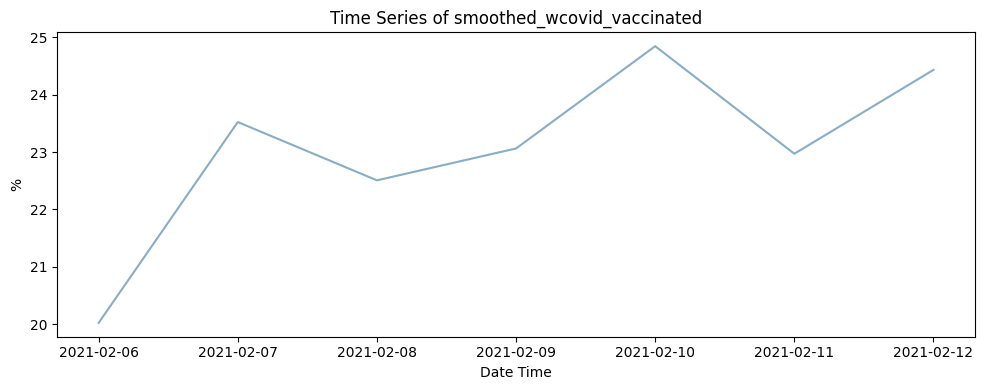

In [21]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='time_value', y='smoothed_wcovid_vaccinated', data=df[df['geo_value']=='10001'])
plt.title('Time Series of smoothed_wcovid_vaccinated')
plt.xlabel('Date Time')
plt.ylabel('%')
plt.tight_layout()
plt.show()

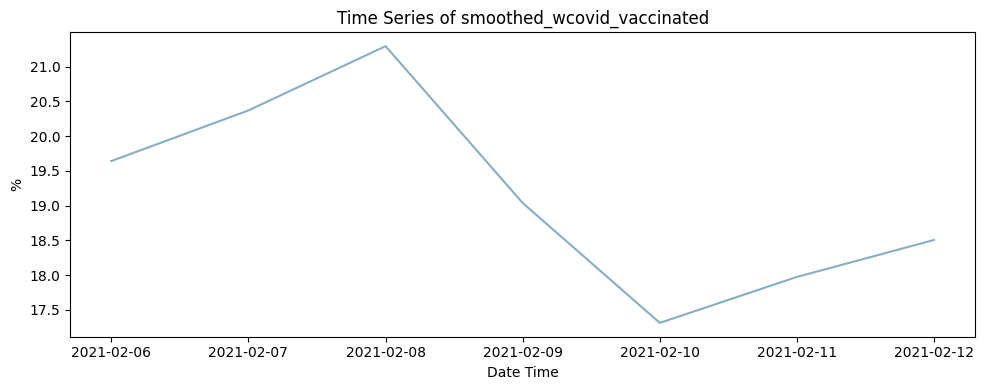

In [22]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='time_value', y='smoothed_wcovid_vaccinated', data=df[df['geo_value']=='10003'])
plt.title('Time Series of smoothed_wcovid_vaccinated')
plt.xlabel('Date Time')
plt.ylabel('%')
plt.tight_layout()
plt.show()

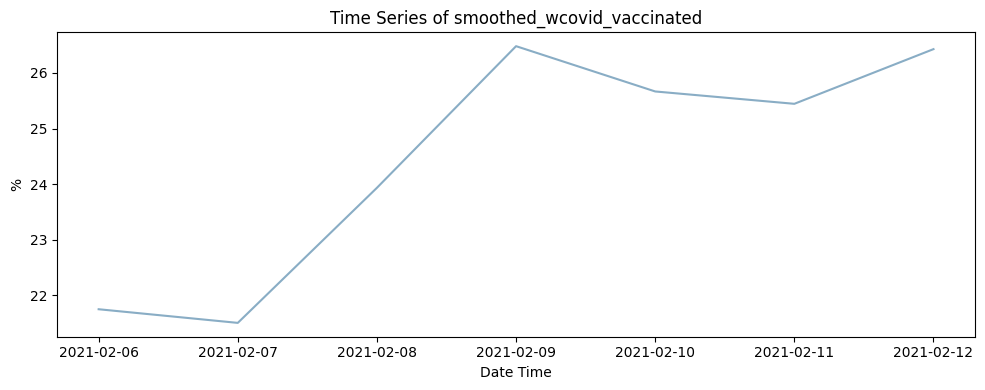

In [23]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='time_value', y='smoothed_wcovid_vaccinated', data=df[df['geo_value']=='10005'])
plt.title('Time Series of smoothed_wcovid_vaccinated')
plt.xlabel('Date Time')
plt.ylabel('%')
plt.tight_layout()
plt.show()

### Week of the day analysis

In [24]:
df['day_of_week'] = df['time_value'].apply(lambda x : x.strftime("%A"))

In [25]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_type = CategoricalDtype(categories=days_order, ordered=True)
df['day_of_week'] = df['day_of_week'].astype(day_type)

# Observed False: Include all categories, even if some are not present in the data.
df_grp_dow = df.groupby('day_of_week', observed=False).agg({'smoothed_wcovid_vaccinated':'mean'}).reset_index()
df_grp_dow

,day_of_week,smoothed_wcovid_vaccinated
0,Monday,20.306791
1,Tuesday,20.731062
2,Wednesday,21.402882
3,Thursday,22.085670
4,Friday,22.659782
5,Saturday,19.380318
6,Sunday,19.893260


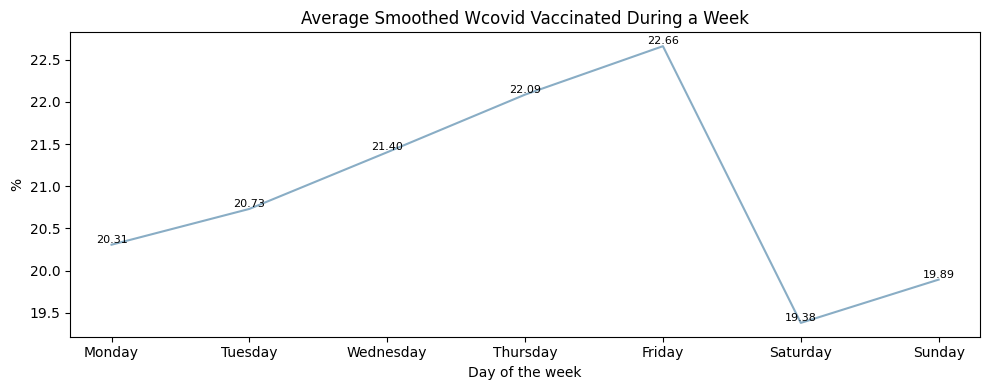

In [26]:
# Plot
plt.figure(figsize=(10, 4))
sns.lineplot(x='day_of_week', y='smoothed_wcovid_vaccinated', data=df_grp_dow)
for i in range(len(df_grp_dow)):
    x = df_grp_dow['day_of_week'].iloc[i]
    y = df_grp_dow['smoothed_wcovid_vaccinated'].iloc[i]
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8)
plt.title('Average Smoothed Wcovid Vaccinated During a Week')
plt.xlabel('Day of the week')
plt.ylabel('%')
plt.tight_layout()
plt.show()

### Null Value

In [27]:
df = df.sort_values(by = ['geo_value','time_value']).reset_index(drop = True)

display(df.head(3))
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,...,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week
0,2021-02-06,10001,32.699199,19.187633,8.791025,68.827417,65.663218,26.680991,65.330731,NaN,...,20.026080,37.648337,27.671691,4.305266,30.862734,94.674122,7.642234,Delaware,Kent,Saturday
1,2021-02-07,10001,36.819275,15.249906,8.246346,68.527244,64.955920,26.667758,62.730589,NaN,...,23.522186,37.956024,27.388525,5.361903,30.822502,94.978346,6.125545,Delaware,Kent,Sunday
2,2021-02-08,10001,37.701923,16.060492,7.767191,68.869323,63.241518,27.913755,63.037248,NaN,...,22.507475,37.308655,27.576218,4.921152,30.082840,95.138547,5.769898,Delaware,Kent,Monday


Shape : (3374, 23)


In [28]:
df_null = pd.DataFrame(df.isnull().sum(), columns=['NULL']).reset_index()
df_null['%NULL'] = df_null['NULL']*100/df.shape[0]
df_null = df_null.sort_values("%NULL", ascending=False)
df_null

,index,NULL,%NULL
9,smoothed_wtested_positive_14d,3147,93.272081
18,smoothed_wwearing_mask,740,21.932424
16,smoothed_wvaccine_likely_politicians,710,21.043272
7,smoothed_wvaccine_likely_govt_health,685,20.302312
17,smoothed_wvaccine_likely_who,685,20.302312
14,smoothed_wvaccine_likely_friends,684,20.272673
11,smoothed_wothers_masked,276,8.180202
6,smoothed_wworried_become_ill,194,5.749852
15,smoothed_wrestaurant_1d,64,1.896858
19,smoothed_wlarge_event_1d,64,1.896858


In [29]:
df = df.drop(columns = {"smoothed_wtested_positive_14d"})
df.isnull().sum()

time_value                                0
geo_value                                 0
smoothed_wspent_time_1d                  64
smoothed_wtested_14d                     22
smoothed_wpublic_transit_1d              64
smoothed_wcovid_vaccinated_or_accept     36
smoothed_wworried_become_ill            194
smoothed_wvaccine_likely_govt_health    685
smoothed_wshop_1d                        64
smoothed_wwork_outside_home_1d           64
smoothed_wothers_masked                 276
smoothed_wcli                             0
smoothed_wcovid_vaccinated               26
smoothed_wvaccine_likely_friends        684
smoothed_wrestaurant_1d                  64
smoothed_wvaccine_likely_politicians    710
smoothed_wvaccine_likely_who            685
smoothed_wwearing_mask                  740
smoothed_wlarge_event_1d                 64
State                                     0
County Name                               0
day_of_week                               0
dtype: int64

In [30]:
df_null_entity = df.drop(columns='geo_value').groupby(df['geo_value']).apply(lambda group: group.isnull().sum()).reset_index()
df_null_entity_melt = pd.melt(df_null_entity, id_vars=['geo_value'], value_vars=[a_col for a_col in df_null_entity if a_col != 'geo_value'], var_name='column_name', value_name='NULL')
df_null_entity_melt['%NULL'] = df_null_entity_melt['NULL'] / df['time_value'].nunique()
df_null_entity_melt

,geo_value,column_name,NULL,%NULL
0,10001,time_value,0,0.0
1,10003,time_value,0,0.0
2,10005,time_value,0,0.0
3,11001,time_value,0,0.0
4,12001,time_value,0,0.0
...,...,...,...,...
10117,55101,day_of_week,0,0.0
10118,55105,day_of_week,0,0.0
10119,55133,day_of_week,0,0.0
10120,55139,day_of_week,0,0.0


In [31]:
list_drop_geo_val = list(df_null_entity_melt[df_null_entity_melt['%NULL']>PERCENT_ENTITY_NULL]['geo_value'].unique())
display(list_drop_geo_val[:10])
print("Len :", len(list_drop_geo_val))

['37101',
 '12061',
 '13117',
 '18063',
 '19169',
 '19193',
 '24015',
 '30013',
 '37025',
 '42097']

Len : 85


In [32]:
df = df[~df['geo_value'].isin(list_drop_geo_val)].reset_index(drop = True)

display(df.head(3))
print("Shape: ", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week
0,2021-02-06,10001,32.699199,19.187633,8.791025,68.827417,65.663218,26.680991,65.330731,48.183010,...,20.026080,37.648337,27.671691,4.305266,30.862734,94.674122,7.642234,Delaware,Kent,Saturday
1,2021-02-07,10001,36.819275,15.249906,8.246346,68.527244,64.955920,26.667758,62.730589,46.288597,...,23.522186,37.956024,27.388525,5.361903,30.822502,94.978346,6.125545,Delaware,Kent,Sunday
2,2021-02-08,10001,37.701923,16.060492,7.767191,68.869323,63.241518,27.913755,63.037248,46.398122,...,22.507475,37.308655,27.576218,4.921152,30.082840,95.138547,5.769898,Delaware,Kent,Monday


Shape:  (2779, 22)


In [33]:
df_null_entity = df.drop(columns='geo_value').groupby(df['geo_value']).apply(lambda group: group.isnull().sum()).reset_index()
df_null_entity_melt = pd.melt(df_null_entity, id_vars=['geo_value'], value_vars=[a_col for a_col in df_null_entity if a_col != 'geo_value'], var_name='column_name', value_name='NULL')
df_null_entity_melt['%NULL'] = df_null_entity_melt['NULL'] / df['time_value'].nunique()
df_null_entity_melt

,geo_value,column_name,NULL,%NULL
0,10001,time_value,0,0.0
1,10003,time_value,0,0.0
2,10005,time_value,0,0.0
3,11001,time_value,0,0.0
4,12001,time_value,0,0.0
...,...,...,...,...
8332,55087,day_of_week,0,0.0
8333,55101,day_of_week,0,0.0
8334,55105,day_of_week,0,0.0
8335,55133,day_of_week,0,0.0


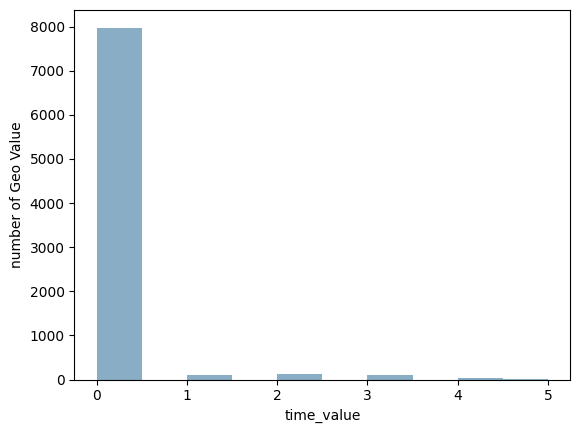

In [34]:
plt.hist(df_null_entity_melt['NULL'])

# Add labels and title
plt.xlabel('time_value')
plt.ylabel('number of Geo Value')

plt.show()

In [35]:
for a_col in df.columns:
    if a_col not in ['time_value','geo_value','State','County Name','day_of_week']:
        df['%s'%a_col] = df.groupby('geo_value')['%s'%a_col].ffill()
df.isnull().sum()

time_value                               0
geo_value                                0
smoothed_wspent_time_1d                  0
smoothed_wtested_14d                     0
smoothed_wpublic_transit_1d              0
smoothed_wcovid_vaccinated_or_accept     0
smoothed_wworried_become_ill             0
smoothed_wvaccine_likely_govt_health    24
smoothed_wshop_1d                        0
smoothed_wwork_outside_home_1d           0
smoothed_wothers_masked                  1
smoothed_wcli                            0
smoothed_wcovid_vaccinated               0
smoothed_wvaccine_likely_friends        20
smoothed_wrestaurant_1d                  0
smoothed_wvaccine_likely_politicians    25
smoothed_wvaccine_likely_who            20
smoothed_wwearing_mask                   1
smoothed_wlarge_event_1d                 0
State                                    0
County Name                              0
day_of_week                              0
dtype: int64

In [36]:
df_null_entity = df.drop(columns='geo_value').groupby(df['geo_value']).apply(lambda group: group.isnull().sum()).reset_index()
df_null_entity_melt = pd.melt(df_null_entity, id_vars=['geo_value'], value_vars=[a_col for a_col in df_null_entity if a_col != 'geo_value'], var_name='column_name', value_name='NULL')
df_null_entity_melt['%NULL'] = df_null_entity_melt['NULL'] / df['time_value'].nunique()
df_null_entity_melt

,geo_value,column_name,NULL,%NULL
0,10001,time_value,0,0.0
1,10003,time_value,0,0.0
2,10005,time_value,0,0.0
3,11001,time_value,0,0.0
4,12001,time_value,0,0.0
...,...,...,...,...
8332,55087,day_of_week,0,0.0
8333,55101,day_of_week,0,0.0
8334,55105,day_of_week,0,0.0
8335,55133,day_of_week,0,0.0


In [37]:
df_null_entity_melt[df_null_entity_melt['NULL']>3].sample()

,geo_value,column_name,NULL,%NULL
2534,28049,smoothed_wvaccine_likely_govt_health,5,0.714286


In [38]:
df[df['geo_value']=='28049'][['time_value','geo_value','smoothed_wvaccine_likely_govt_health']]

,time_value,geo_value,smoothed_wvaccine_likely_govt_health
1064,2021-02-06,28049,NaN
1065,2021-02-07,28049,NaN
1066,2021-02-08,28049,NaN
1067,2021-02-09,28049,NaN
1068,2021-02-10,28049,NaN
1069,2021-02-11,28049,28.554344
1070,2021-02-12,28049,25.763042


In [39]:
df = df.dropna()
df.isnull().sum()

time_value                              0
geo_value                               0
smoothed_wspent_time_1d                 0
smoothed_wtested_14d                    0
smoothed_wpublic_transit_1d             0
smoothed_wcovid_vaccinated_or_accept    0
smoothed_wworried_become_ill            0
smoothed_wvaccine_likely_govt_health    0
smoothed_wshop_1d                       0
smoothed_wwork_outside_home_1d          0
smoothed_wothers_masked                 0
smoothed_wcli                           0
smoothed_wcovid_vaccinated              0
smoothed_wvaccine_likely_friends        0
smoothed_wrestaurant_1d                 0
smoothed_wvaccine_likely_politicians    0
smoothed_wvaccine_likely_who            0
smoothed_wwearing_mask                  0
smoothed_wlarge_event_1d                0
State                                   0
County Name                             0
day_of_week                             0
dtype: int64

In [40]:
df['time_value_shift_1'] = df.groupby('geo_value')['time_value'].shift(1)

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week,time_value_shift_1
0,2021-02-06,10001,32.699199,19.187633,8.791025,68.827417,65.663218,26.680991,65.330731,48.183010,...,37.648337,27.671691,4.305266,30.862734,94.674122,7.642234,Delaware,Kent,Saturday,NaT
1,2021-02-07,10001,36.819275,15.249906,8.246346,68.527244,64.955920,26.667758,62.730589,46.288597,...,37.956024,27.388525,5.361903,30.822502,94.978346,6.125545,Delaware,Kent,Sunday,2021-02-06
2,2021-02-08,10001,37.701923,16.060492,7.767191,68.869323,63.241518,27.913755,63.037248,46.398122,...,37.308655,27.576218,4.921152,30.082840,95.138547,5.769898,Delaware,Kent,Monday,2021-02-07
3,2021-02-09,10001,36.782852,15.779060,7.452131,71.744309,63.479295,31.768168,60.557307,40.272843,...,38.838196,25.259619,5.551673,34.370559,94.625411,5.534978,Delaware,Kent,Tuesday,2021-02-08
4,2021-02-10,10001,33.319952,12.837715,2.041177,72.171535,65.314007,28.528320,63.845535,38.435611,...,34.601037,20.565419,6.633538,32.737365,93.874916,4.969996,Delaware,Kent,Wednesday,2021-02-09


Shape : (2750, 23)


In [41]:
df['day_shift'] = df['time_value'] - df['time_value_shift_1']

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week,time_value_shift_1,day_shift
0,2021-02-06,10001,32.699199,19.187633,8.791025,68.827417,65.663218,26.680991,65.330731,48.183010,...,27.671691,4.305266,30.862734,94.674122,7.642234,Delaware,Kent,Saturday,NaT,NaT
1,2021-02-07,10001,36.819275,15.249906,8.246346,68.527244,64.955920,26.667758,62.730589,46.288597,...,27.388525,5.361903,30.822502,94.978346,6.125545,Delaware,Kent,Sunday,2021-02-06,1 days
2,2021-02-08,10001,37.701923,16.060492,7.767191,68.869323,63.241518,27.913755,63.037248,46.398122,...,27.576218,4.921152,30.082840,95.138547,5.769898,Delaware,Kent,Monday,2021-02-07,1 days
3,2021-02-09,10001,36.782852,15.779060,7.452131,71.744309,63.479295,31.768168,60.557307,40.272843,...,25.259619,5.551673,34.370559,94.625411,5.534978,Delaware,Kent,Tuesday,2021-02-08,1 days
4,2021-02-10,10001,33.319952,12.837715,2.041177,72.171535,65.314007,28.528320,63.845535,38.435611,...,20.565419,6.633538,32.737365,93.874916,4.969996,Delaware,Kent,Wednesday,2021-02-09,1 days


Shape : (2750, 24)


In [42]:
df[df['day_shift']>pd.Timedelta(days=1)]

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week,time_value_shift_1,day_shift


In [43]:
df = df.drop(columns = {'time_value_shift_1','day_shift'})

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week
0,2021-02-06,10001,32.699199,19.187633,8.791025,68.827417,65.663218,26.680991,65.330731,48.183010,...,20.026080,37.648337,27.671691,4.305266,30.862734,94.674122,7.642234,Delaware,Kent,Saturday
1,2021-02-07,10001,36.819275,15.249906,8.246346,68.527244,64.955920,26.667758,62.730589,46.288597,...,23.522186,37.956024,27.388525,5.361903,30.822502,94.978346,6.125545,Delaware,Kent,Sunday
2,2021-02-08,10001,37.701923,16.060492,7.767191,68.869323,63.241518,27.913755,63.037248,46.398122,...,22.507475,37.308655,27.576218,4.921152,30.082840,95.138547,5.769898,Delaware,Kent,Monday
3,2021-02-09,10001,36.782852,15.779060,7.452131,71.744309,63.479295,31.768168,60.557307,40.272843,...,23.062367,38.838196,25.259619,5.551673,34.370559,94.625411,5.534978,Delaware,Kent,Tuesday
4,2021-02-10,10001,33.319952,12.837715,2.041177,72.171535,65.314007,28.528320,63.845535,38.435611,...,24.843072,34.601037,20.565419,6.633538,32.737365,93.874916,4.969996,Delaware,Kent,Wednesday


Shape : (2750, 22)


In [44]:
df.isnull().sum()

time_value                              0
geo_value                               0
smoothed_wspent_time_1d                 0
smoothed_wtested_14d                    0
smoothed_wpublic_transit_1d             0
smoothed_wcovid_vaccinated_or_accept    0
smoothed_wworried_become_ill            0
smoothed_wvaccine_likely_govt_health    0
smoothed_wshop_1d                       0
smoothed_wwork_outside_home_1d          0
smoothed_wothers_masked                 0
smoothed_wcli                           0
smoothed_wcovid_vaccinated              0
smoothed_wvaccine_likely_friends        0
smoothed_wrestaurant_1d                 0
smoothed_wvaccine_likely_politicians    0
smoothed_wvaccine_likely_who            0
smoothed_wwearing_mask                  0
smoothed_wlarge_event_1d                0
State                                   0
County Name                             0
day_of_week                             0
dtype: int64

In [45]:
df.to_pickle("cleaned_test_dataset.pkl")